In [26]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [3]:
base_dir = r"C:\Users\aashutosh kumar\Music\Hand_digit"
digits = os.listdir(base_dir)
digit_path = list(map(lambda x: os.path.join(base_dir, x), digits))

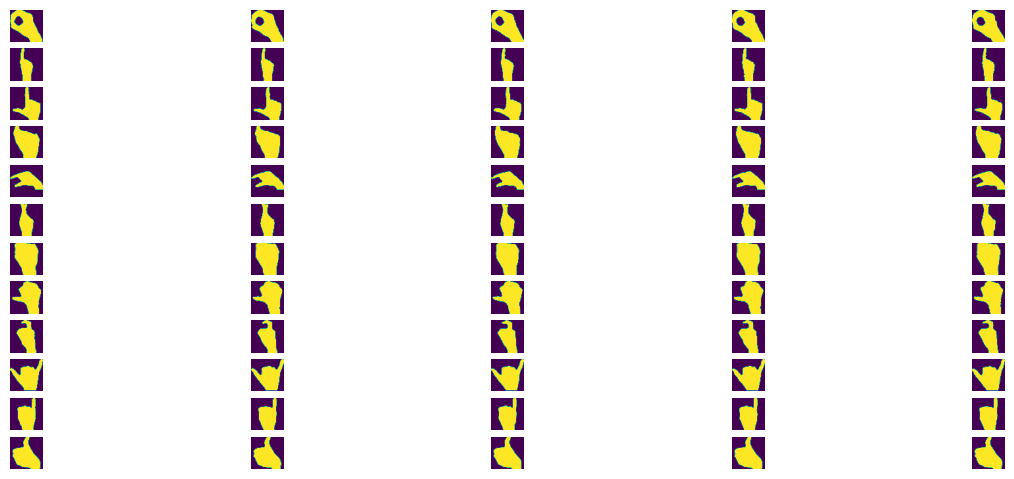

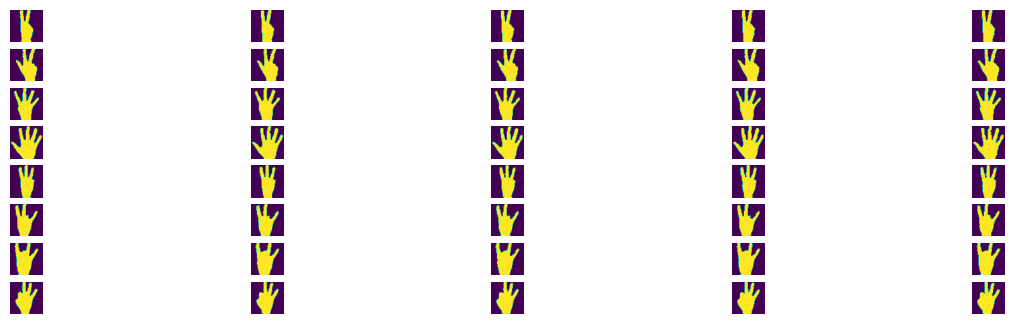

In [4]:
max_subplots = 20 * 3  # Total number of subplots in one figure
plot_count = 0

for dir_path in digit_path:
    file_list = os.listdir(dir_path)[:5]
    for file_name in file_list:
        file_path = os.path.join(dir_path, file_name)
        img = plt.imread(file_path)
        
        if plot_count % max_subplots == 0:
            if plot_count > 0:
                plt.show()
            plt.figure(figsize=(15, 10))
        
        plt.subplot(20, 5, (plot_count % max_subplots) + 1)
        plt.imshow(img)
        plt.axis("off")
        plot_count += 1

plt.show()  # Show the last figure

In [5]:
img = plt.imread(r"C:\Users\aashutosh kumar\Music\Hand_digit\1\903.jpg")
img.shape

(50, 50)

In [6]:
train_data = keras.preprocessing.image_dataset_from_directory(directory = r"C:\Users\aashutosh kumar\Music\Hand_digit",
                                                              color_mode = "grayscale",
                                                              batch_size = 32,
                                                              image_size = (50,50),
                                                              seed = 123,
                                                              validation_split = 0.2,
                                                              subset = "training")

val_data = keras.preprocessing.image_dataset_from_directory(directory = r"C:\Users\aashutosh kumar\Music\Hand_digit",
                                                              color_mode = "grayscale",
                                                              batch_size = 32,
                                                              image_size = (50,50),
                                                              seed = 123,
                                                              validation_split = 0.2,
                                                              subset = "validation")

Found 6000 files belonging to 20 classes.
Using 4800 files for training.
Found 6000 files belonging to 20 classes.
Using 1200 files for validation.


In [7]:
for images, labels in train_data.take(1):
    print(images.shape)  
    
for images, labels in val_data.take(1):
    print(images.shape)
    

(32, 50, 50, 1)
(32, 50, 50, 1)


In [8]:
def norm(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label

train_data=train_data.map(norm)
val_data=val_data.map(norm)

In [9]:
train_data

<MapDataset element_spec=(TensorSpec(shape=(None, 50, 50, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  
                         input_shape=(50, 50, 1))) 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
  
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 
model.add(Flatten())

model.add(Dense(units = 64,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 128,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 128,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 64,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 20,activation = "softmax"))

model.compile(metrics=["accuracy"],loss="sparse_categorical_crossentropy",optimizer="Adam")

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [12]:
history = model.fit(train_data,epochs = 50,validation_data = val_data)

Epoch 1/50
150/150 [==============================] - 12s 24ms/step - loss: 2.9467 - accuracy: 0.0579 - val_loss: 2.7277 - val_accuracy: 0.1675
Epoch 2/50
150/150 [==============================] - 3s 21ms/step - loss: 2.5976 - accuracy: 0.1481 - val_loss: 2.1149 - val_accuracy: 0.2417
Epoch 3/50
150/150 [==============================] - 3s 21ms/step - loss: 2.1756 - accuracy: 0.2373 - val_loss: 1.6680 - val_accuracy: 0.4808
Epoch 4/50
150/150 [==============================] - 3s 19ms/step - loss: 1.8400 - accuracy: 0.3077 - val_loss: 1.2933 - val_accuracy: 0.5358
Epoch 5/50
150/150 [==============================] - 3s 21ms/step - loss: 1.6680 - accuracy: 0.3527 - val_loss: 1.2232 - val_accuracy: 0.5708
Epoch 6/50
150/150 [==============================] - 3s 20ms/step - loss: 1.5897 - accuracy: 0.3967 - val_loss: 1.1273 - val_accuracy: 0.5792
Epoch 7/50
150/150 [==============================] - 3s 21ms/step - loss: 1.5102 - accuracy: 0.4338 - val_loss: 1.0360 - val_accuracy: 0.703

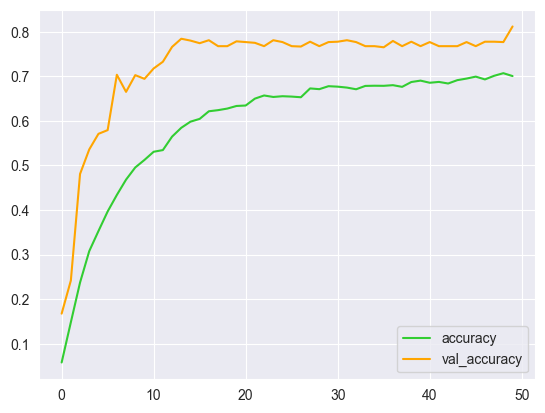

In [17]:
sns.set_style("darkgrid")
plt.plot(history.history["accuracy"],color = "limegreen")
plt.plot(history.history["val_accuracy"],color = "orange")
plt.legend(["accuracy","val_accuracy"])

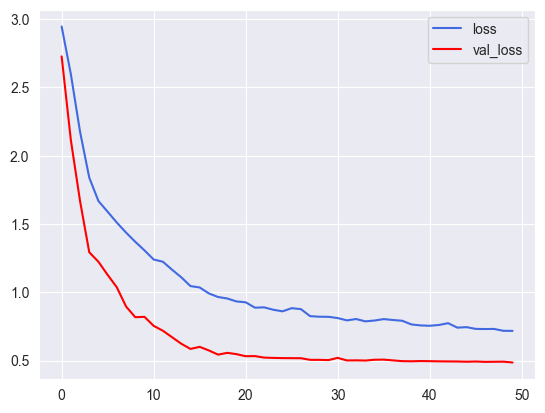

In [18]:
sns.set_style("darkgrid")
plt.plot(history.history["loss"],color = "royalblue")
plt.plot(history.history["val_loss"],color = "red")
plt.legend(["loss","val_loss"])

In [19]:
model.save("Hand_Dig_Rec.h5")

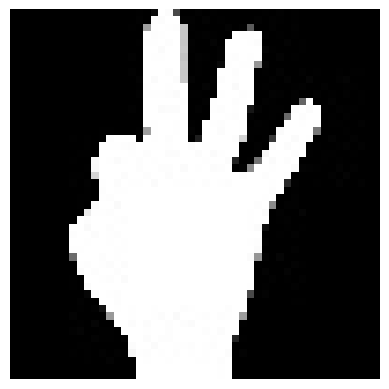

In [64]:
img = cv2.imread(r"C:\Users\aashutosh kumar\Music\Hand_digit\9\912.jpg")
img  = cv2.resize(img,(50,50))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [65]:
img_input = img.reshape(1, 50, 50, 1)
result = model.predict(img_input)


1/1 [==============================] - 0s 39ms/step


In [69]:
predicted_class = np.argmax(result, axis=-1)[0]

In [67]:
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Sort classes alphabetically
classes.sort()

# Print the sorted list of classes
print("Sorted Classes:", classes)

Sorted Classes: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9']


In [68]:
predicted_label = classes[predicted_class]
print("Predicted Label:", predicted_label)

Predicted Label: 9
